# Environment Setup / Package Installation

In [ ]:
!pip install -U statsmodels==0.11.0

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading and Preprocessing

In [2]:
from google.colab import files
uploaded = files.upload()

Saving maunalua.csv to maunalua.csv


In [3]:
maunaloa = pd.read_csv('maunalua.csv',
                       parse_dates=[[0, 1]], na_values=[-999.99],
                        index_col="Year_Month")
maunaloa.head()

,Decimal Date,co2,Seasonally Adjusted CO2,Carbon Dioxide Fit (ppm),Seasonally Adjusted CO2 Fit (ppm)
Year_Month,,,,,
1958-03-01,1958.2027,315.69,314.42,316.18,314.89
1958-04-01,1958.2877,317.45,315.15,317.30,314.98
1958-05-01,1958.3699,317.50,314.73,317.83,315.06
1958-06-01,1958.4548,NaN,NaN,317.22,315.14
1958-07-01,1958.5370,315.86,315.17,315.87,315.21


In [4]:
maunaloa.co2.head()

Year_Month
1958-03-01    315.69
1958-04-01    317.45
1958-05-01    317.50
1958-06-01       NaN
1958-07-01    315.86
Name: co2, dtype: float64

In [5]:
maunaloa.co2.isnull().sum()

15

In [6]:
maunaloa.fillna(method="ffill", inplace=True)  # or bfill
maunaloa.co2.isnull().sum()

0

In [7]:
resampled_co2 = maunaloa.co2.resample("MS")
resampled_co2

In [8]:
resampled_co2.mean().head()

Year_Month
1958-03-01    315.69
1958-04-01    317.45
1958-05-01    317.50
1958-06-01    317.50
1958-07-01    315.86
Freq: MS, Name: co2, dtype: float64

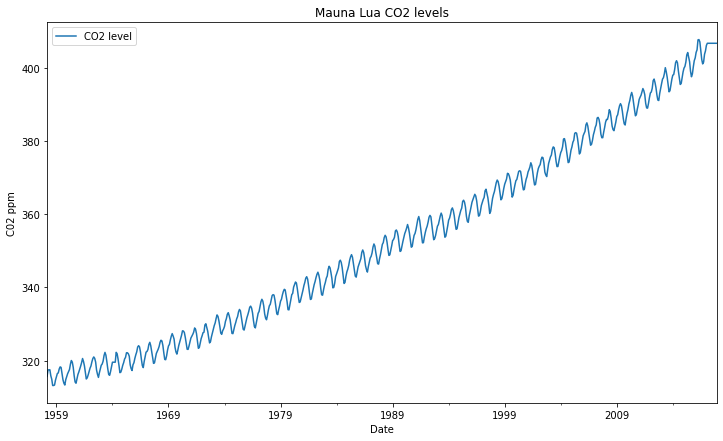

In [9]:
# Quick look at the data
fig, ax = plt.subplots(1,1,figsize=(12,7))
pt_CO2fit = maunaloa.co2.plot(ax=ax, label='CO2 level')
plt.xlabel('Date')
plt.ylabel('C02 ppm')
plt.title('Mauna Lua CO2 levels')
plt.legend()
plt.show()


# Resampling

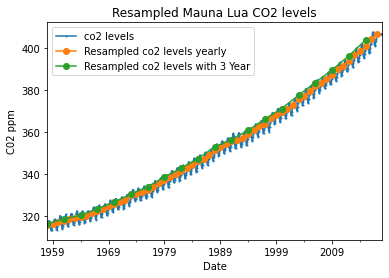

In [10]:
maunaloa.co2.resample("MS").mean().plot(marker="o", markersize=1)
maunaloa.co2.resample("AS").mean().plot(marker="o")
maunaloa.co2.resample("3AS").mean().plot(marker="o")
plt.xlabel('Date')
plt.ylabel('C02 ppm')
plt.title('Resampled Mauna Lua CO2 levels')
plt.legend(['co2 levels','Resampled co2 levels yearly', 'Resampled co2 levels with 3 Year'])
plt.show()


# Additive Seasonal Decomposition

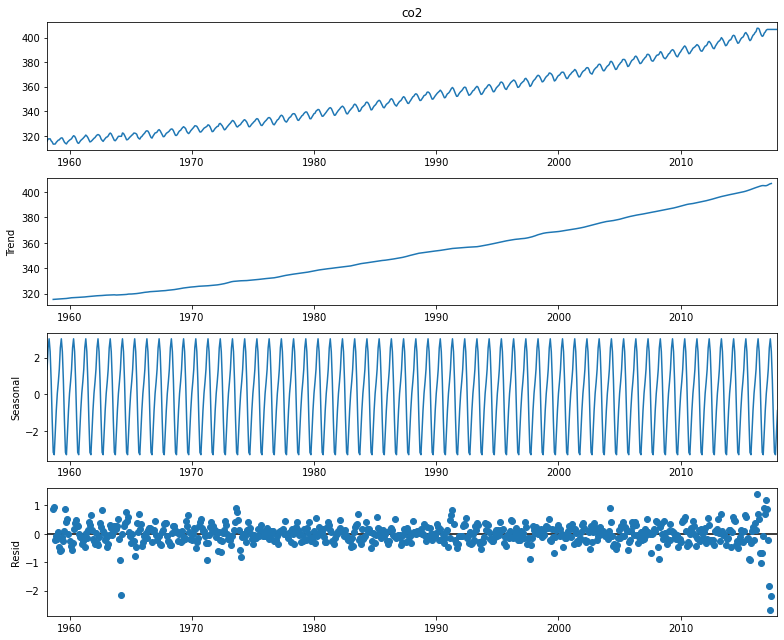

In [12]:
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

decomposition = sm.tsa.seasonal_decompose(maunaloa.co2, model='additive')
fig = decomposition.plot()
plt.show()

# Multiplicative Seasonal Decomposition

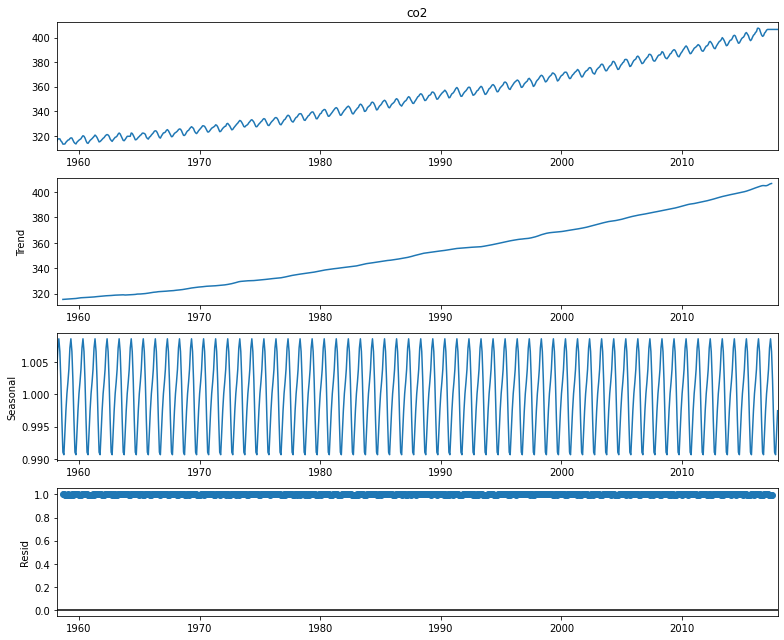

In [13]:
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

decomposition = sm.tsa.seasonal_decompose(maunaloa.co2, model='multiplicative')
fig = decomposition.plot()
plt.show()

# Autocorrelation

In [14]:
ppm = maunaloa.co2
ppm.autocorr()


0.9989418731988614

In [15]:
ppm.autocorr(lag=6)

0.9886035248085111

In [16]:
ppm.autocorr(lag=12)

0.9996839190698729

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


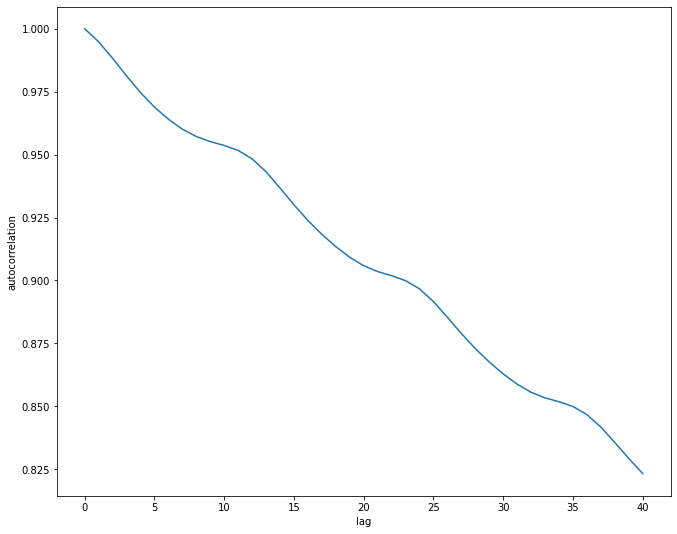

In [17]:
from statsmodels.tsa.stattools import acf
autocorrelation = acf(ppm)
plt.xlabel('lag')
plt.ylabel('autocorrelation')
plt.plot(autocorrelation)

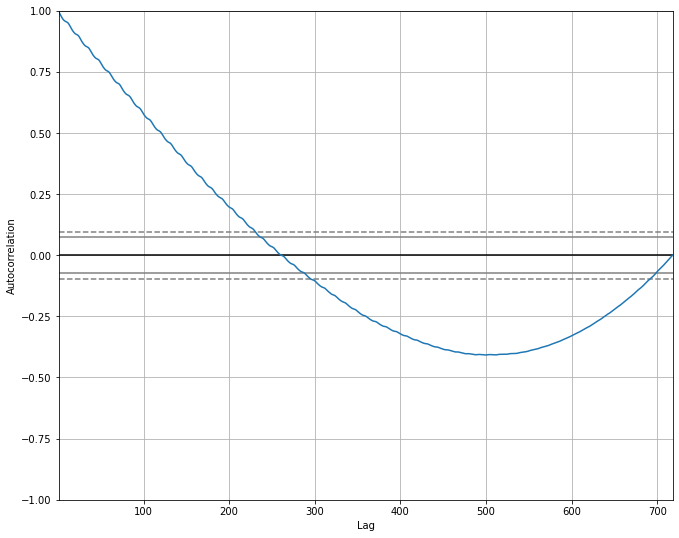

In [18]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(ppm)

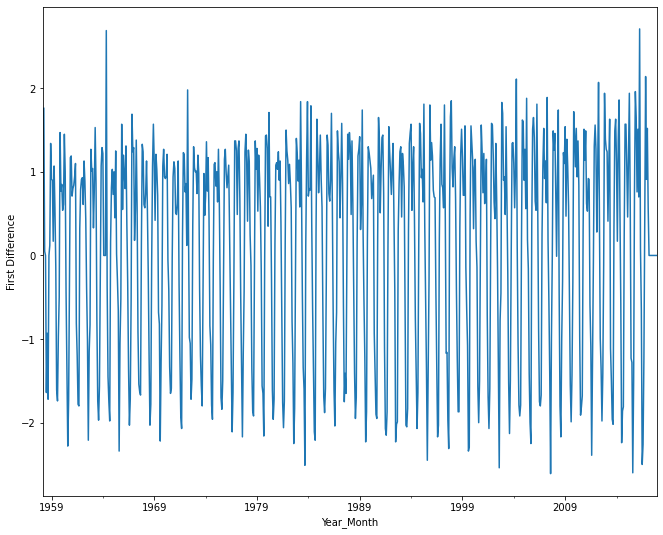

In [19]:
plt.xlabel('monthly observations')
plt.ylabel('First Difference')
ppm.diff().plot()

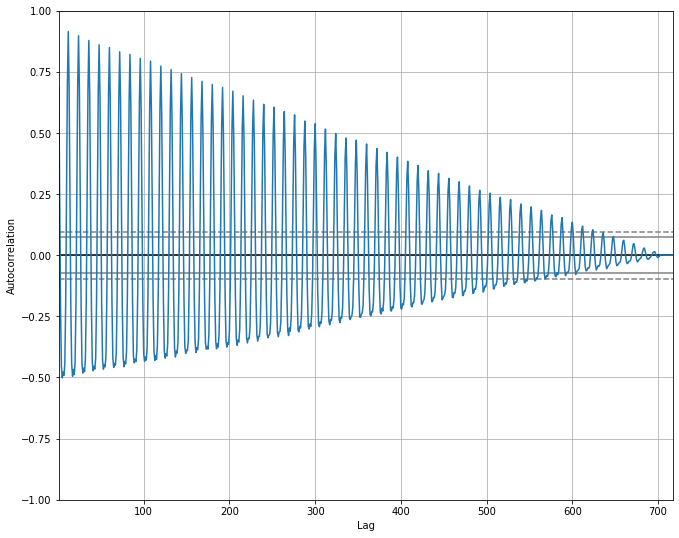

In [ ]:
autocorrelation_plot(ppm.diff()[1:])

/Users/udaykamath/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


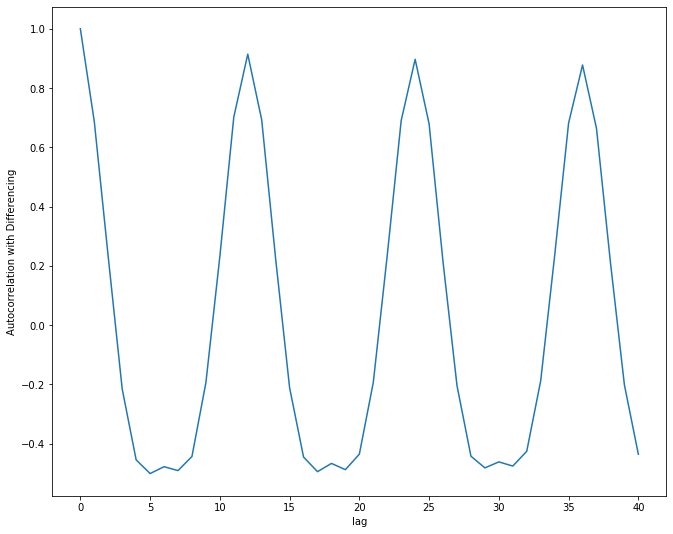

In [ ]:
from statsmodels.tsa.stattools import acf
autocorrelation = acf(ppm.diff()[1:])
plt.xlabel('lag')
plt.ylabel('Autocorrelation with Differencing')
plt.plot(autocorrelation)

In [ ]:
cv = ppm.std()/ppm.mean()
print(cv)

0.07621487034294225


# Augmented Dickey–Fuller (ADF) Statistic 

In [20]:
from statsmodels.tsa.stattools import adfuller
adf = adfuller(ppm)
print('ADF Statistic: %f' % adf[0])
print('p-value: %f' % adf[1])
print('Critical Values:')
for key, value in adf[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 4.791287
p-value: 1.000000
Critical Values:
	1%: -3.440
	5%: -2.866
	10%: -2.569


In [22]:
de_trended = ppm.diff(1).dropna()
adf2 = adfuller(de_trended)
print('ADF Statistic: %f' % adf2[0])
print('p-value: %f' % adf2[1])
print('Critical Values:')
for key, value in adf2[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.737248
p-value: 0.000072
Critical Values:
	1%: -3.440
	5%: -2.866
	10%: -2.569
